### Impoting Libraries

In [109]:
import pickle
import subprocess
import numpy as np
import tqdm.notebook as nb
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

### Declaring Basic Commands and Variables

##### **W**: Range of width.  
##### **P**: Range of probabilities.  
##### **N**: Iterations per experiment.  

In [103]:
command = "cd Scripts && javac Main.java && java Main"

W = np.arange(1, 21)  # From 1 to 20, steps of 1. (20 values)
P = np.arange(0.05, 1, 0.05)  # From 0.05 to 0.95 steps of 0.05. (19 values)
N = 10

print(W, P)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95]


#### Run and retrive output from Java

In [104]:
def run_experiment(w: int, p: float):
    cmd = command + f' {w} {p}'
    result = subprocess.check_output(cmd, shell=True).decode("utf-8")
    return int(result)

#### Run the simulation for all the values of w, p
#### Save the result to a pickle file

In [44]:
pb = nb.tqdm(total = 3800)

result = []

for w in W:
    temp_p = []
    for p in P:
        temp = 0
        for i in range(N):
            pb.update(n=1)
            temp += run_experiment(w, p)
        temp /= N
        temp_p.append(temp)
    result.append(temp_p)

with open("result.pkl", "wb") as f:
    pickle.dump(result, f)

  0%|          | 0/4000 [00:00<?, ?it/s]

#### Load the result from the pickle file

In [105]:
result = pickle.load(open("result.pkl", "rb"))

result = np.array(result)

#### Plot Time vs Width for p=0.7
##### (Theoretical and Experimental)

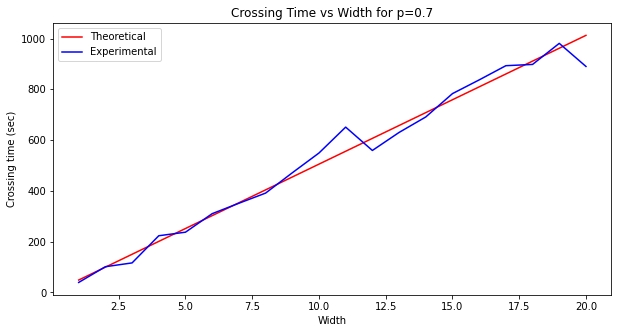

In [106]:
theoretical_x = W
theoretical_y = 10 * (W - 0.7**3 - 0.7 + 1)/((1- 0.7)*(1 - 0.7**3))

experimental_x = W
experimental_y = result[:, 13]

plt.figure(figsize=(10,5))
plt.plot(theoretical_x, theoretical_y, c='red', label='Theoretical')
plt.plot(experimental_x, experimental_y, c='blue', label='Experimental')
plt.title("Crossing Time vs Width for p=0.7")
plt.xlabel("Width")
plt.ylabel("Crossing time (sec)")
plt.legend(loc="upper left")
plt.savefig("TvsW.pdf")
plt.show()

#### Plot Time vs Probabilty for w=10
##### (Theoretical and Experimental)

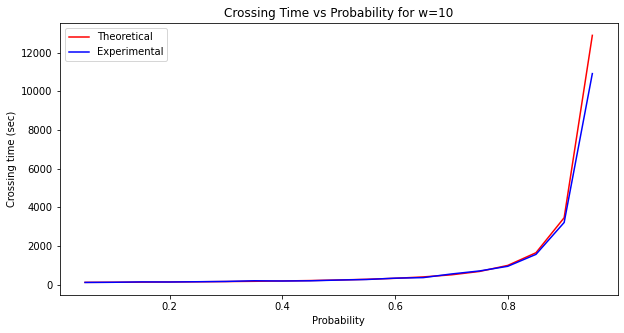

In [107]:
theoretical_x = P
theoretical_y = 10 * (10 - P**3 - P + 1)/((1- P)*(1 - P**3))

experimental_x = P
experimental_y = result[9]

plt.figure(figsize=(10,5))
plt.plot(theoretical_x, theoretical_y, c='red', label='Theoretical')
plt.plot(experimental_x, experimental_y, c='blue', label='Experimental')
plt.title("Crossing Time vs Probability for w=10")
plt.xlabel("Probability")
plt.ylabel("Crossing time (sec)")
plt.legend(loc="upper left")
plt.savefig("TvsP.pdf")
plt.show()

#### Contour Plot of Time vs (Width, Probabilty)

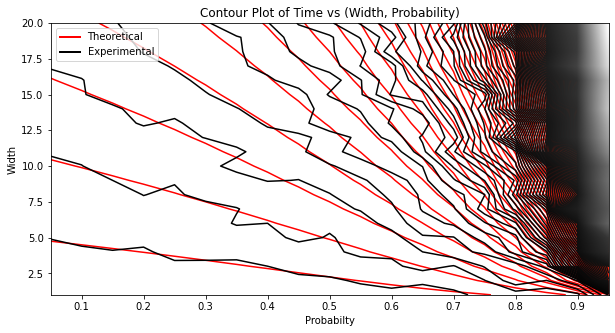

In [118]:
custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='black', lw=2)]

def time(W, P):
    return 10 * (W - P**3 - P + 1)/((1- P)*(1 - P**3))


W = np.arange(1, 21)  # From 1 to 20, steps of 1. (20 values)
P = np.arange(0.05, 1, 0.05)  # From p steps of 0.05. (19 values)

P, W = np.meshgrid(P, W)

Z = time(W,P) # Theoretical Time

plt.figure(figsize=(10, 5))
ax = plt.subplot()

ax.contour(P, W, Z, 500, cmap='autumn')
ax.contour(P, W, result, 500, cmap='gray')

plt.title("Contour Plot of Time vs (Width, Probability)")
plt.xlabel("Probabilty")
plt.ylabel("Width")
ax.legend(custom_lines, ['Theoretical', 'Experimental'], loc="upper left")

plt.savefig("contour.pdf")
plt.show()